In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dating_data = pd.read_csv("Speed Dating Data.csv",
                         encoding="ISO-8859-1")

In [2]:
dating_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
dating_data.shape

(8378, 195)

In [4]:
dating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [5]:
pd.set_option('display.max_rows', 200)

dating_data.isna().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

From the Data Documentation, Waves 1-4, 10, 11, and 15-17 had the most common design, which had no variations in the pool of individuals, conditioning, and had the same preference scale, so we will filter the data to just those waves

In [6]:
## waves with the most common experiment design
exp_waves = [1, 2, 3, 4, 10, 11, 15, 16, 17]

## filtering to data only from most common design waves
dating_df = dating_data.loc[dating_data.wave.isin(exp_waves)].copy()

## removing columns that are not relevant to these waves (i.e. all missing values in the filtered data)
dating_df = dating_df.dropna(axis=1, how='all')

dating_df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [7]:
## we see that all the columns are still relevant. Let's see how many entries there are remaining

dating_df.shape

(3760, 195)

In [8]:
## And the missing values in the filtered df:

print(dating_df.isnull().sum())

iid            0
id             0
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1656
order          0
partner        0
pid            0
match          0
int_corr      72
samerace       0
age_o         20
race_o        20
pf_o_att      36
pf_o_sin      36
pf_o_int      36
pf_o_fun      36
pf_o_amb      36
pf_o_sha      36
dec_o          0
attr_o        48
sinc_o        88
intel_o       96
fun_o        121
amb_o        308
shar_o       507
like_o        53
prob_o        82
met_o        119
age           20
field         20
field_cd      39
undergra    1674
mn_sat      2350
tuition     2181
race          20
imprace       36
imprelig      36
from          36
zipcode      309
income      1832
goal          36
date          54
go_out        36
career        36
career_c      85
sports        36
tvsports      36
exercise      36
dining        36
museums       36
art           36
hiking        36
gaming        36
clubbing      

Since we have a lot of columns, and a lot of columns in which missing values are prevalent, let's filter the dataframe down to only have columns where there are only missing values for <=10% of rows 

In [9]:
import math

reduced_dating_df = dating_df.dropna(axis=1, thresh=math.floor(dating_df.shape[0]*0.9))
reduced_dating_df.shape

(3760, 89)

In [10]:
print(reduced_dating_df.isnull().sum())

iid           0
id            0
gender        0
idg           0
condtn        0
wave          0
round         0
position      0
order         0
partner       0
pid           0
match         0
int_corr     72
samerace      0
age_o        20
race_o       20
pf_o_att     36
pf_o_sin     36
pf_o_int     36
pf_o_fun     36
pf_o_amb     36
pf_o_sha     36
dec_o         0
attr_o       48
sinc_o       88
intel_o      96
fun_o       121
amb_o       308
like_o       53
prob_o       82
met_o       119
age          20
field        20
field_cd     39
race         20
imprace      36
imprelig     36
from         36
zipcode     309
goal         36
date         54
go_out       36
career       36
career_c     85
sports       36
tvsports     36
exercise     36
dining       36
museums      36
art          36
hiking       36
gaming       36
clubbing     36
reading      36
tv           36
theater      36
movies       36
concerts     36
music        36
shopping     36
yoga         36
exphappy     36
attr1_1 

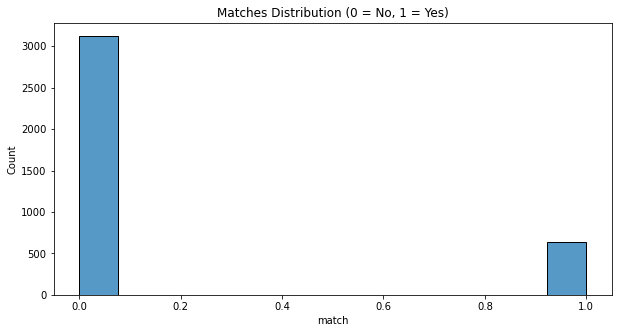

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(reduced_dating_df.match, kde=False)
plt.title("Matches Distribution (0 = No, 1 = Yes)")
plt.show()

In [12]:
print(f"Percent of entries that are matches in the data: {reduced_dating_df.match.mean()}")

Percent of entries that are matches in the data: 0.16914893617021276


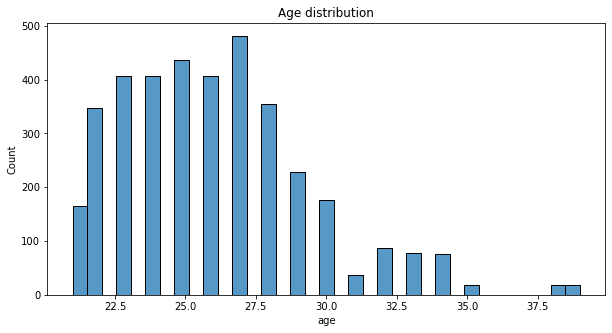

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(reduced_dating_df.age, kde=False)
plt.title("Age distribution")
plt.show()

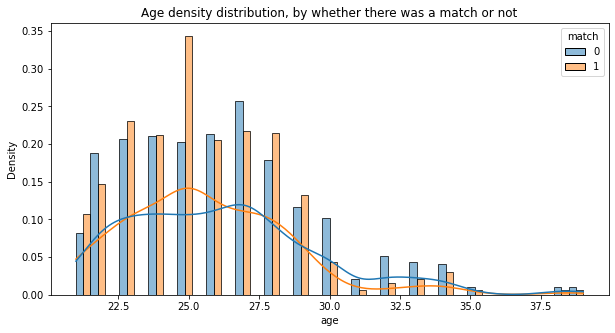

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data=reduced_dating_df, x="age",
             kde=True, stat='density', hue="match", 
             common_norm=False, multiple="dodge")
plt.title("Age density distribution, by whether there was a match or not")
plt.show()

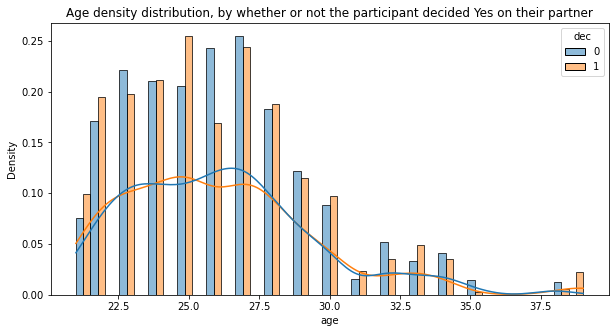

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(data=reduced_dating_df, x="age",
             kde=True, stat='density', hue="dec", 
             common_norm=False, multiple="dodge")
plt.title("Age density distribution, by whether or not the participant decided Yes on their partner")
plt.show()

Are some fields more likely to get matches than others?

In [16]:
field_match_index = reduced_dating_df.groupby('field')['match'].mean().sort_values(ascending=False).index
reduced_dating_df.groupby('field')['match'].mean().sort_values(ascending=False)

field
money                                                  0.900000
Masters in Public Administration                       0.750000
Fundraising Management                                 0.666667
Religion                                               0.611111
Law/Business                                           0.500000
GS Postbacc PreMed                                     0.476190
Communications                                         0.444444
International Educational Development                  0.388889
Classics                                               0.370370
Education                                              0.368421
Elementary Education                                   0.368421
Japanese Literature                                    0.333333
Biomedical Engineering                                 0.333333
MA Science Education                                   0.333333
Mathematical Finance                                   0.315789
Art History                       

But we have to account for the disparity in how many participants are from these fields

In [17]:
reduced_dating_df.groupby('field')['field'].count().sort_values(ascending=False)[field_match_index]

field
money                                                   10
Masters in Public Administration                        20
Fundraising Management                                   6
Religion                                                18
Law/Business                                            10
GS Postbacc PreMed                                      21
Communications                                          18
International Educational Development                   18
Classics                                                27
Education                                               19
Elementary Education                                    19
Japanese Literature                                      9
Biomedical Engineering                                   6
MA Science Education                                    21
Mathematical Finance                                    19
Art History                                             21
Climate-Earth and Environ. Science                

The coded field column standardizes the field column into 18 categories (according to the documentation), which consolidates similar fields, as well as fields that are the same but entered differently into the data. Let's focus on this column, then

In [18]:
reduced_dating_df.field_cd.dtype

dtype('float64')

In [20]:
reduced_dating_df.field_cd = reduced_dating_df.field_cd.astype('category')
reduced_dating_df.field_cd.dtype

/Users/davidshimshoni/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


CategoricalDtype(categories=[ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
                  11.0, 12.0, 13.0, 14.0, 15.0, 16.0],
, ordered=False)

In [21]:
reduced_dating_df = reduced_dating_df.drop('field', axis=1)

In [23]:
## From the documentation
field_code_dict = {
    1.0: "Law", 
    2.0: "Math",
    3.0: "Social Science, Psychologist", 
    4.0: "Medical Science, Pharmaceuticals, and Bio Tech",
    5.0: "Engineering", 
    6.0: "English/Creative Writing/ Journalism",
    7.0: "History/Religion/Philosophy",
    8.0: "Business/Econ/Finance",
    9.0: "Education, Academia",
    10.0: "Biological Sciences/Chemistry/Physics",
    11.0: "Social Work",
    12.0: "Undergrad/undecided",
    13.0: "Political Science/International Affairs", 
    14.0: "Film",
    15.0: "Fine Arts/Arts Administration",
    16.0: "Languages"
}

reduced_dating_df.field_cd = reduced_dating_df.field_cd.cat.rename_categories(field_code_dict)

In [24]:
reduced_dating_df.field_cd.head()

0    Law
1    Law
2    Law
3    Law
4    Law
Name: field_cd, dtype: category
Categories (16, object): ['Law', 'Math', 'Social Science, Psychologist', 'Medical Science, Pharmaceuticals, and Bio Tech', ..., 'Political Science/International Affairs', 'Film', 'Fine Arts/Arts Administration', 'Languages']

In [25]:
field_match_index = reduced_dating_df.groupby('field_cd')['match'].mean().sort_values(ascending=False).index
reduced_dating_df.groupby('field_cd')['match'].mean().sort_values(ascending=False)

field_cd
Languages                                         0.233333
Medical Science, Pharmaceuticals, and Bio Tech    0.229508
History/Religion/Philosophy                       0.226804
Education, Academia                               0.221719
Law                                               0.220561
Film                                              0.198198
Political Science/International Affairs           0.183784
Social Science, Psychologist                      0.177778
English/Creative Writing/ Journalism              0.163743
Biological Sciences/Chemistry/Physics             0.153477
Business/Econ/Finance                             0.151634
Engineering                                       0.143836
Fine Arts/Arts Administration                     0.142857
Social Work                                       0.116766
Math                                              0.098765
Undergrad/undecided                               0.052632
Name: match, dtype: float64

In [26]:
reduced_dating_df.groupby('field_cd')['field_cd'].count().sort_values(ascending=False)[field_match_index]

field_cd
Languages                                          30
Medical Science, Pharmaceuticals, and Bio Tech     61
History/Religion/Philosophy                        97
Education, Academia                               221
Law                                               535
Film                                              111
Political Science/International Affairs           185
Social Science, Psychologist                      360
English/Creative Writing/ Journalism              171
Biological Sciences/Chemistry/Physics             417
Business/Econ/Finance                             765
Engineering                                       292
Fine Arts/Arts Administration                      42
Social Work                                       334
Math                                               81
Undergrad/undecided                                19
Name: field_cd, dtype: int64

The data includes a column that is the correlation of the participant and partners' interests at the start of the experiment. We can see how that varies with if the partners match or not

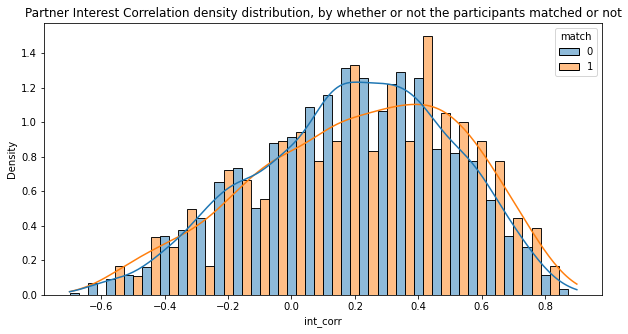

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(data=reduced_dating_df, x="int_corr",
             kde=True, stat='density', hue="match", 
             common_norm=False, multiple="dodge")
plt.title("Partner Interest Correlation density distribution, by whether or not the participants matched or not")
plt.show()